# Project 9: Pasta classifier with CNNs

The notebook explains how to use a convolutional neural network to recognise images of different types of pasta. The project was developed as part of the Spiced Academy Data Science Bootcamp.

In [30]:
# imports


import os
import glob
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# model
from tensorflow.keras.models import Sequential

# layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten

# categorical
from tensorflow.keras.utils import to_categorical

#optimizer
from tensorflow.keras.optimizers import Adam

#callbacks
from tensorflow.keras.callbacks import EarlyStopping


## Importing the images data and preprocessing them

In [31]:
X = []

In [32]:
y = []

In [33]:
classes = ['farfalle', 'fusilli','linguine', 'penne']

In [34]:
base_path ='/Users/giudittaparolini/Documents/Bootcamp/vanilla-vectors-student-code/project9_imageclassifier/imageclassifier/data/'

In [35]:
for i, target in enumerate(classes):
    files = glob.glob(os.path.join(base_path,target,'*.png'), recursive = True)

    for file in files:
        img =load_img(os.path.join(base_path,target,file), grayscale=False, color_mode='rgb', target_size=(224,224))
        img_array = img_to_array(img, data_format=None, dtype=None)
        X.append(img_array)
        if target == 'farfalle':
            y.append(0)
        elif target == 'fusilli':
            y.append(1)
        elif target == 'linguine':
            y.append(2)
        elif target == 'penne':
            y.append(3)
        else:
            raise Exception("Sorry, this type of pasta is not available")
  
    

In [36]:
# Reshaping the arrays
X=np.array(X)
print(X.shape)


(516, 224, 224, 3)


In [37]:
print(type(X))

<class 'numpy.ndarray'>


In [38]:
X.reshape(-1,224,224,3)
len(X)

516

In [39]:
y=np.array(y)
print(y.shape)

(516,)


In [40]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [41]:
y = to_categorical(y)
y.shape

(516, 4)

In [42]:
X.shape

(516, 224, 224, 3)

## Creating the CNN model

In [43]:
model = Sequential([
    # First convolutional layer
    Conv2D(filters=6, kernel_size=(3,3), input_shape=(224,224,3), padding='same'),
    MaxPool2D(pool_size=(2,2), strides=(1,1)),
    Activation('tanh'),
    
    # Second convolutional layer
    Conv2D(filters=3, kernel_size=(3,3), input_shape=(224,224,3), padding='same'),
    MaxPool2D(pool_size=(2,2), strides=(1,1)),
    Activation('relu'),
    
    # Flatten and Dense
    Flatten(),
    Dense(units=4, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 6)       168       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 223, 223, 6)       0         
_________________________________________________________________
activation_2 (Activation)    (None, 223, 223, 6)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 223, 223, 3)       165       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 222, 222, 3)       0         
_________________________________________________________________
activation_3 (Activation)    (None, 222, 222, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147852)           

In [45]:
#compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [46]:
#inserting a callback
callback = EarlyStopping(monitor='val_loss',
                                         min_delta=0.001,
                                         patience=5,
                                         mode='min')

In [47]:
# fit the model
history = model.fit(x=X, y=y, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 13s 918ms/step - loss: 1.5045 - accuracy: 0.3342 - val_loss: 2.7309 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 18s 1s/step - loss: 1.1220 - accuracy: 0.6341 - val_loss: 2.8721 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 15s 1s/step - loss: 0.7771 - accuracy: 0.7616 - val_loss: 3.8033 - val_accuracy: 0.0096
Epoch 4/50
13/13 [==============================] - 16s 1s/step - loss: 0.3603 - accuracy: 0.9183 - val_loss: 4.8024 - val_accuracy: 0.0769
Epoch 5/50
13/13 [==============================] - 13s 980ms/step - loss: 0.2120 - accuracy: 0.9446 - val_loss: 4.2143 - val_accuracy: 0.1635
Epoch 6/50
13/13 [==============================] - 12s 946ms/step - loss: 0.0471 - accuracy: 0.9981 - val_loss: 7.8002 - val_accuracy: 0.0865
Epoch 7/50
13/13 [==============================] - 14s 1s/step - loss: 0.1268 - accuracy: 0.9845 - val_loss: 5.6756 - val_accuracy: 0.1442
Epo

In [48]:
model.save('cnn_two_layers')

INFO:tensorflow:Assets written to: cnn_two_layers/assets


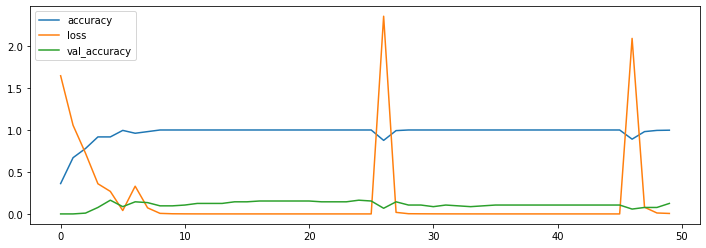

In [80]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [50]:
model.evaluate(X, y)

17/17 [==============================] - 7s 415ms/step - loss: 2.7129 - accuracy: 0.8236


[2.7129170894622803, 0.8236433863639832]

## Making predictions

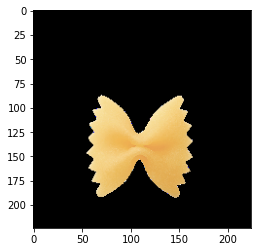

In [67]:
test1 = load_img(os.path.join('test_images', 'farfalla.png'), color_mode='rgb', target_size =(224,224))
plt.imshow(test1)

In [68]:
test1_array = img_to_array(test1)
test1_array = test1_array.reshape(-1,224,224,3)
pred_test1 = model.predict(test1_array)
prediction_test1 = np.round(pred_test1, decimals=3)
prediction_test1

array([[0.822, 0.178, 0.   , 0.   ]], dtype=float32)

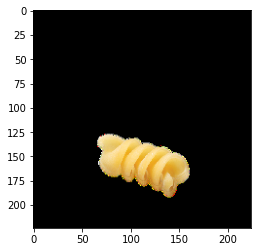

In [69]:
test2 = load_img(os.path.join('test_images', 'fusillo.png'), target_size =(224,224))
plt.imshow(test2)

In [70]:
test2_array = img_to_array(test2)
test2_array = test2_array.reshape(-1,224,224,3)
pred_test2 = model.predict(test2_array)
prediction_test2 = np.round(pred_test2, decimals=3)
prediction_test2

array([[0.127, 0.866, 0.   , 0.007]], dtype=float32)

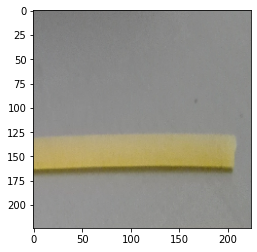

In [76]:
test3 = load_img(os.path.join('test_images', 'linguina.png'), target_size =(224,224))
plt.imshow(test3)

In [77]:
test3_array = img_to_array(test3)
test3_array = test3_array.reshape(-1,224,224,3)
pred_test3 = model.predict(test3_array)
prediction_test3 = np.round(pred_test3, decimals=3)
prediction_test3

array([[0., 1., 0., 0.]], dtype=float32)

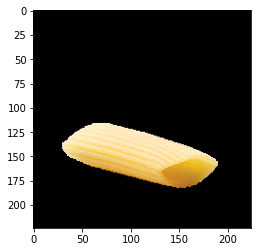

In [78]:
test4 = load_img(os.path.join('test_images', 'penna.png'), target_size =(224,224))
plt.imshow(test4)

In [75]:
test4_array = img_to_array(test4)
test4_array = test4_array.reshape(-1,224,224,3)
pred_test4 = model.predict(test4_array)
prediction_test4 = np.round(pred_test4, decimals=3)
prediction_test4

array([[0.32, 0.68, 0.  , 0.  ]], dtype=float32)

## LeNet-5 architecture

In [103]:
model_alt = Sequential([
### Implement LeNet-5 here
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding="same", input_shape=(224, 224, 3)),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),
    
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding="valid"),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),
    
    Flatten(),
    
    Dense(120),
    Activation('relu'),
    
    Dense(84),
    Activation('relu'),
    
    Dense(4),
    Activation('softmax'),
])

In [104]:
model_alt.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 6)       456       
_________________________________________________________________
activation_15 (Activation)   (None, 224, 224, 6)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 16)      2416      
_________________________________________________________________
activation_16 (Activation)   (None, 108, 108, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 46656)            

In [105]:
model_alt.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [106]:
callback = EarlyStopping(monitor='val_loss',
                                         min_delta=0.001,
                                         patience=5,
                                         mode='min')

In [107]:
history_alt = model_alt.fit(x=X, y=y, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 10s 700ms/step - loss: 72.3698 - accuracy: 0.2855 - val_loss: 2.7804 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 9s 666ms/step - loss: 0.9960 - accuracy: 0.5562 - val_loss: 3.3216 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 11s 890ms/step - loss: 0.5824 - accuracy: 0.8114 - val_loss: 1.6692 - val_accuracy: 0.2404
Epoch 4/50
13/13 [==============================] - 11s 830ms/step - loss: 0.6573 - accuracy: 0.8402 - val_loss: 3.1257 - val_accuracy: 0.1058
Epoch 5/50
13/13 [==============================] - 9s 717ms/step - loss: 0.2487 - accuracy: 0.9165 - val_loss: 4.1140 - val_accuracy: 0.0288
Epoch 6/50
13/13 [==============================] - 8s 651ms/step - loss: 0.1985 - accuracy: 0.9382 - val_loss: 3.8384 - val_accuracy: 0.0962
Epoch 7/50
13/13 [==============================] - 8s 653ms/step - loss: 0.1520 - accuracy: 0.9571 - val_loss: 1.4123 - val_accuracy: 0

In [108]:
model.save('le_net')

INFO:tensorflow:Assets written to: le_net/assets


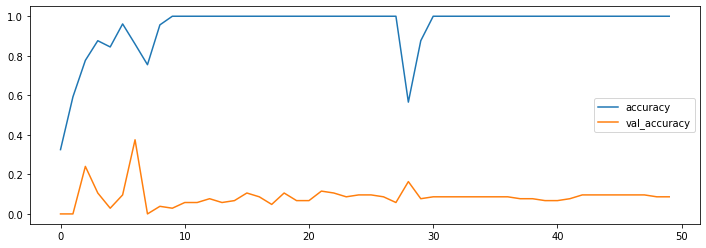

In [109]:
plt.figure(figsize=(12,4))
plt.plot(history_alt.history['accuracy'], label='accuracy')
plt.plot(history_alt.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [110]:
pred2_test1 = model_alt.predict(test1_array)
prediction2_test1 = np.round(pred2_test1, decimals=3)
prediction2_test1

array([[0., 0., 0., 1.]], dtype=float32)

In [111]:
pred2_test2 = model_alt.predict(test2_array)
prediction2_test2 = np.round(pred2_test2, decimals=3)
prediction2_test2

array([[0., 1., 0., 0.]], dtype=float32)

In [112]:
pred2_test3 = model_alt.predict(test3_array)
prediction2_test3 = np.round(pred2_test3, decimals=3)
prediction2_test3

array([[0.   , 0.007, 0.993, 0.   ]], dtype=float32)

In [113]:
pred2_test4 = model_alt.predict(test4_array)
prediction2_test4 = np.round(pred2_test4, decimals=3)
prediction2_test4

array([[0., 1., 0., 0.]], dtype=float32)